In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

In [6]:
excel_file_path = 'Data/prc_hicp_midx__custom_8955744_spreadsheet.xlsx'
sheet_name = 'Feuille 2'
skip_rows = 8  # Skip the first 8 rows (start from the 9th row)

# Read the specific sheet from the Excel file, skipping the specified rows
data = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=skip_rows)

# Filter and keep only columns that do not start with "Unnamed"
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]

/opt/mamba/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [9]:
data

,TIME,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
0,GEO (Libellés),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Union européenne (UE6-1958, UE9-1973, UE10-198...",:,:,:,:,:,:,:,:,:,...,114.86,115.37,115.89,116.46,116.66,116.74,116.71,116.75,116.52,:
2,Union européenne - 27 pays (à partir de 2020),:,:,:,:,:,:,:,:,:,...,114.21,114.73,115.24,115.8,116.01,116.08,116.06,116.1,115.86,:
3,Union européenne - 28 pays (2013-2020),:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,"Zone euro (EA11-1999, EA12-2001, EA13-2007, EA...",:,:,:,:,:,:,:,:,:,...,112.06,112.69,113.21,113.73,113.87,113.88,113.9,113.99,113.77,:
5,Zone euro - 20 pays (à partir de 2023),:,:,:,:,:,:,:,:,:,...,112.01,112.64,113.16,113.68,113.83,113.83,113.85,113.94,113.73,:
6,Zone euro - 19 pays (2015-2022),:,:,:,:,:,:,:,:,:,...,112.03,112.66,113.22,113.67,113.81,113.8,113.82,113.89,113.68,:
7,Belgique,:,:,:,:,:,:,:,:,:,...,107.43,108.34,106.4,106.89,107.36,107.96,105.93,105.63,102.47,:
8,Bulgarie,:,:,:,:,:,:,:,:,:,...,120.98,121.53,122.01,122.94,122.33,122.98,122.41,122.68,123.4,:
9,Tchéquie,:,:,:,:,:,:,:,:,:,...,91.3,86.9,87.1,88.6,92.1,91.4,88.8,87,86.1,:


In [12]:
df = data.iloc[1:-7]

In [13]:
df = df[df.iloc[:, 0].str.startswith("France")]

In [14]:
df

,TIME,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,...,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11
16,France,67.41,67.03,67.04,67.41,67.51,68.32,68.45,68.44,68.45,...,124.67,126.29,127.39,127.7,127.4,127.51,128.19,127.88,127.96,:


In [15]:
st = df.iloc[:, 1:]
st = st.T

In [16]:
st.columns = ['Prix']
st.replace(":", np.nan, inplace=True)

In [18]:
st.index = pd.to_datetime(st.index, format='%Y-%m')

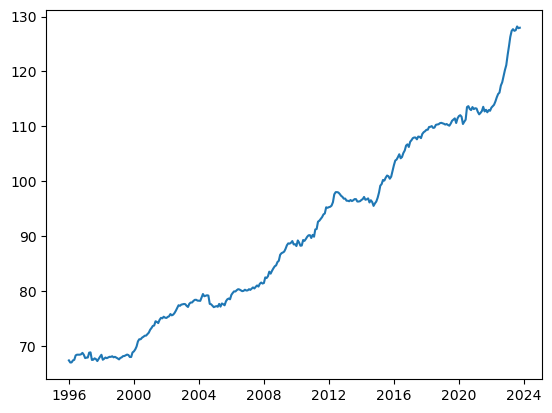

In [19]:
plt.plot(st['Prix'])

/tmp/ipykernel_976/4279532222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Prix', data=st,palette=sns.color_palette('muted', 12))


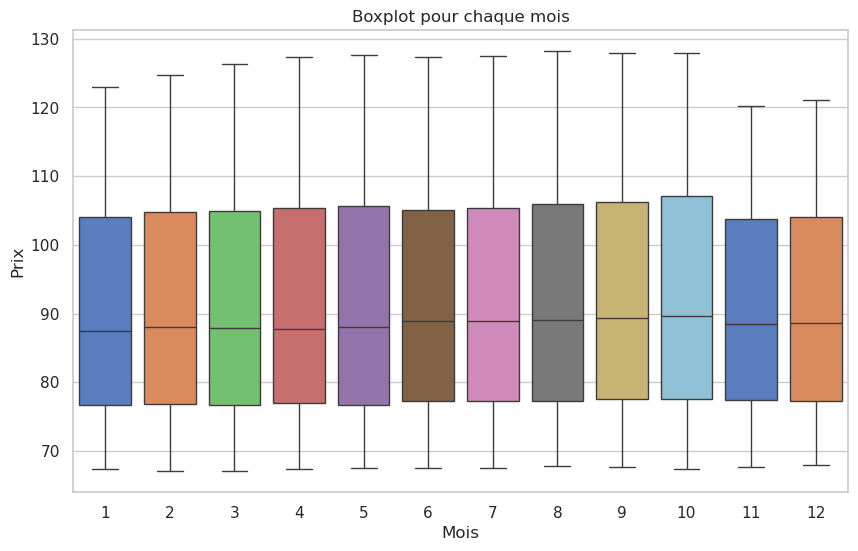

In [20]:
st['month'] = st.index.month

# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Prix', data=st,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque mois')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.show()

In [21]:
df_filtered = st['2000-01-01':'2005-12-01']

/tmp/ipykernel_976/2354909021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))


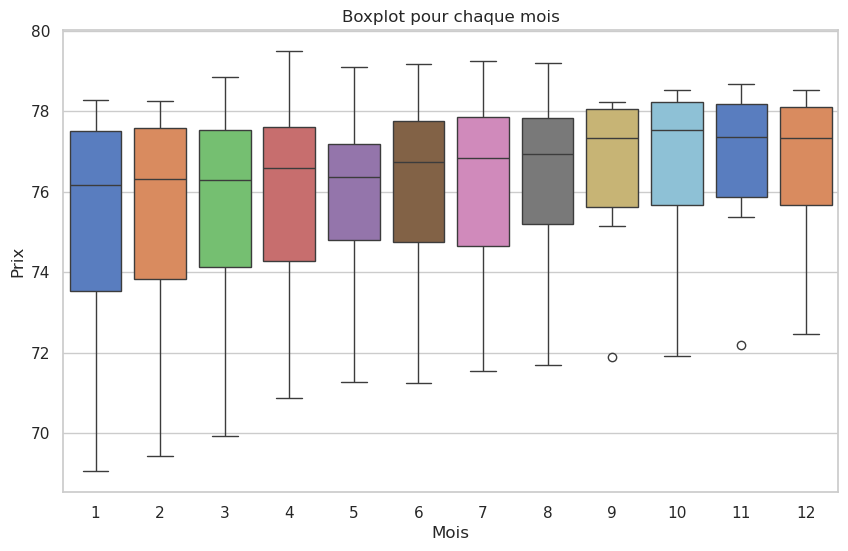

In [23]:
# Créez un boxplot avec seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Prix', data=df_filtered,palette=sns.color_palette('muted', 12))
plt.title('Boxplot pour chaque mois')
plt.xlabel('Mois')
plt.ylabel('Prix')
plt.show()